In [157]:
%matplotlib inline


Group analysis of resting-state fMRI with ICA: CanICA
=====================================================

An example applying CanICA to resting-state data. This example applies it
to 30 subjects of the ADHD200 datasets. Then it plots a map with all the
components together and an axial cut for each of the components separately.

CanICA is an ICA method for group-level analysis of fMRI data. Compared
to other strategies, it brings a well-controlled group model, as well as a
thresholding algorithm controlling for specificity and sensitivity with
an explicit model of the signal. The reference papers are:

    * G. Varoquaux et al. "A group model for stable multi-subject ICA on
      fMRI datasets", NeuroImage Vol 51 (2010), p. 288-299

    * G. Varoquaux et al. "ICA-based sparse features recovery from fMRI
      datasets", IEEE ISBI 2010, p. 1177

Pre-prints for both papers are available on hal
(http://hal.archives-ouvertes.fr)

<div class="alert alert-info"><h4>Note</h4><p>The use of the attribute `components_img_` from decomposition
    estimators is implemented from version 0.4.1.
    For older versions, unmask the deprecated attribute `components_`
    to get the components image using attribute `masker_` embedded in
    estimator.
    See the `section Inverse transform: unmasking data <unmasking_step>`.</p></div>



First we load the HCP data
-------------------------------



In [158]:
import os

func_filenames=[]
for x in os.listdir('/srv1/HCP_4mm')[:5]:
    #print(x)
    file='/srv1/HCP_4mm/'+str(x)+'/MNINonLinear/Results/tfMRI_EMOTION_LR/tfMRI_EMOTION_LR.nii.gz'
    #file="/srv1/HCP_4mm/"+str(x)+"/MNINonLinear/Results/tfMRI_EMOTION_LR/tfMRI_EMOTION_LR_hp200_s4.feat/filtered_func_data.nii.gz"   
    if os.path.isfile(file):
        func_filenames.append(file)
print func_filenames

T1='/srv1/bin/fMRI-Toolbox/templates/MNI152_4mm_brain_mask.nii'

['/srv1/HCP_4mm/205725/MNINonLinear/Results/tfMRI_EMOTION_LR/tfMRI_EMOTION_LR.nii.gz', '/srv1/HCP_4mm/105216/MNINonLinear/Results/tfMRI_EMOTION_LR/tfMRI_EMOTION_LR.nii.gz', '/srv1/HCP_4mm/105620/MNINonLinear/Results/tfMRI_EMOTION_LR/tfMRI_EMOTION_LR.nii.gz', '/srv1/HCP_4mm/106016/MNINonLinear/Results/tfMRI_EMOTION_LR/tfMRI_EMOTION_LR.nii.gz', '/srv1/HCP_4mm/106319/MNINonLinear/Results/tfMRI_EMOTION_LR/tfMRI_EMOTION_LR.nii.gz']


Here we apply CanICA on the data
---------------------------------



In [159]:
from nilearn.decomposition import CanICA

canica = CanICA(n_components=40, smoothing_fwhm=3.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0)
data=canica.prepare_data(func_filenames)
print(data.shape)
canica._raw_fit(data)
# Retrieve the independent components in brain space. Directly
# accesible through attribute `components_img_`. Note that this
# attribute is implemented from version 0.4.1. For older versions,
# see note section above for details.
components_img = canica.components_img_
# components_img is a Nifti Image object, and can be saved to a file with
# the following line:
components_img.to_filename('canica_resting_state.nii.gz')

[MultiNiftiMasker.fit] Loading data from [/srv1/HCP_4mm/205725/MNINonLinear/Results/tfMRI_EMOTION_LR/tfMRI_EMOTION_LR.nii.gz, /srv1/HCP_4mm/105216/MNINonLinear/Results/tfMRI_EMOTION_LR/tfMRI_EMOTION_LR.nii.gz, /srv1/HCP_4mm/105620/MNINonLine
[MultiNiftiMasker.fit] Computing mask


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished


[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/srv1/HCP_4mm/205725/MNINonLinear/Results/tfMRI_EMOTION_LR/tfMRI_EMOTION_LR.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/srv1/HCP_4mm/105216/MNINonLinear/Results/tfMRI_EMOTION_LR/tfMRI_EMOTION_LR.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/srv1/HCP_4mm/105620/MNINonLinear/Results/tfMRI_EMOTION_LR/tfMRI_EMOTION_LR.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 6.4s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.007608, ..., -0.003098],
       ...,
       [ 0.006704, ...,  0.008218]]), fun='cube', random_state=398764591, whiten=True)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s


__________________________________________________________fastica - 7.4s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.007608, ..., -0.003098],
       ...,
       [ 0.006704, ...,  0.008218]]), fun='cube', random_state=924231285, whiten=True)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.9s remaining:    0.0s


__________________________________________________________fastica - 9.6s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.007608, ..., -0.003098],
       ...,
       [ 0.006704, ...,  0.008218]]), fun='cube', random_state=1478610112, whiten=True)


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.5s remaining:    0.0s


_________________________________________________________fastica - 10.6s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.007608, ..., -0.003098],
       ...,
       [ 0.006704, ...,  0.008218]]), fun='cube', random_state=441365315, whiten=True)


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   34.2s remaining:    0.0s


_________________________________________________________fastica - 16.0s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.007608, ..., -0.003098],
       ...,
       [ 0.006704, ...,  0.008218]]), fun='cube', random_state=1537364731, whiten=True)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   50.2s remaining:    0.0s


_________________________________________________________fastica - 11.7s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.007608, ..., -0.003098],
       ...,
       [ 0.006704, ...,  0.008218]]), fun='cube', random_state=192771779, whiten=True)


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.0min remaining:    0.0s


_________________________________________________________fastica - 11.3s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.007608, ..., -0.003098],
       ...,
       [ 0.006704, ...,  0.008218]]), fun='cube', random_state=1491434855, whiten=True)


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.2min remaining:    0.0s


_________________________________________________________fastica - 12.7s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.007608, ..., -0.003098],
       ...,
       [ 0.006704, ...,  0.008218]]), fun='cube', random_state=1819583497, whiten=True)


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.4min remaining:    0.0s


__________________________________________________________fastica - 7.9s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.007608, ..., -0.003098],
       ...,
       [ 0.006704, ...,  0.008218]]), fun='cube', random_state=530702035, whiten=True)


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.6min remaining:    0.0s


__________________________________________________________fastica - 7.2s, 0.1min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.7min finished


To visualize we plot the outline of all components on one figure
-----------------------------------------------------------------



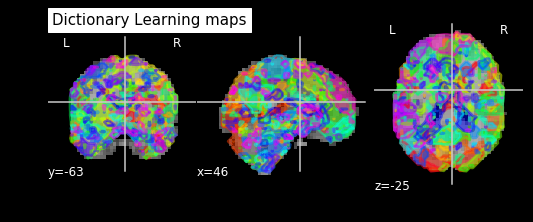

In [162]:

from nilearn import plotting
T1='/srv1/bin/fMRI-Toolbox/templates/MNI152_444.nii.gz'
plotting.plot_prob_atlas(components_img, bg_img=T1,threshold=0.01, view_type='filled_contours',
                         title='Dictionary Learning maps')


Finally, we plot the map for each ICA component separately
-----------------------------------------------------------



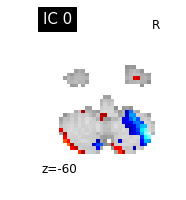

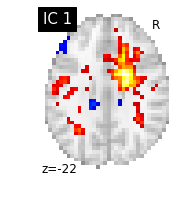

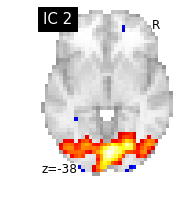

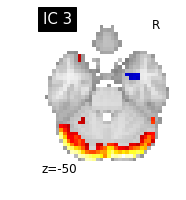

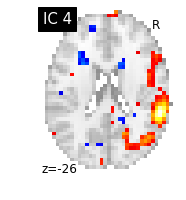

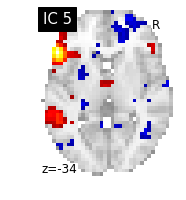

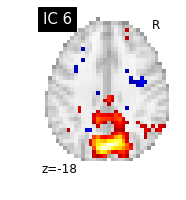

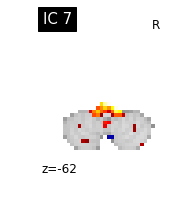

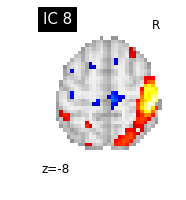

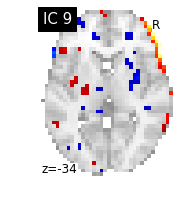

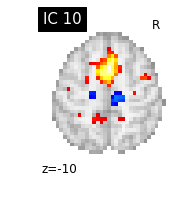

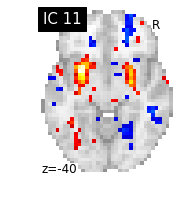

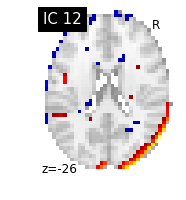

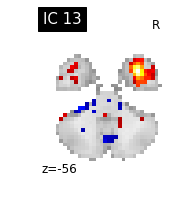

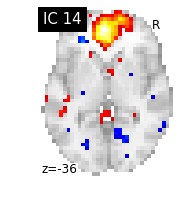

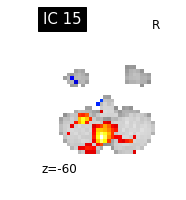

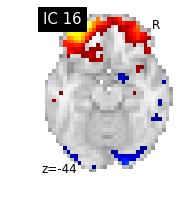

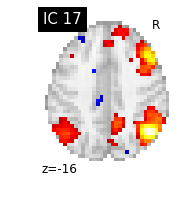

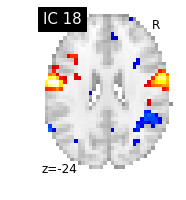

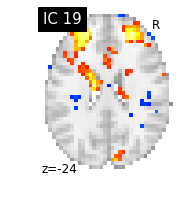

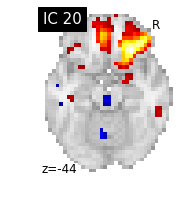

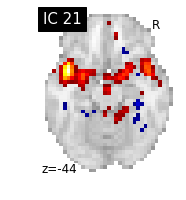

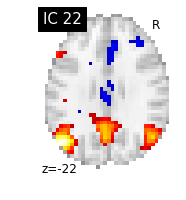

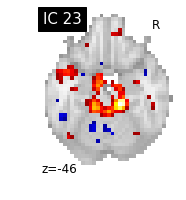

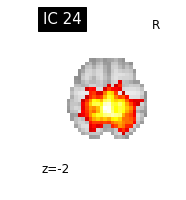

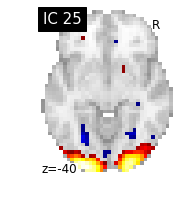

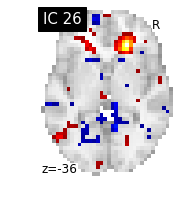

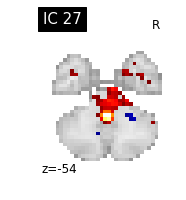

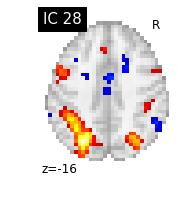

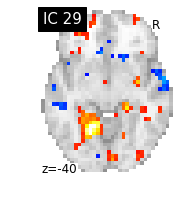

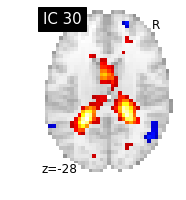

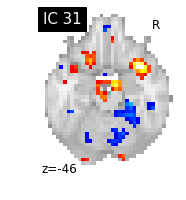

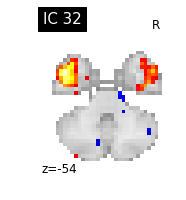

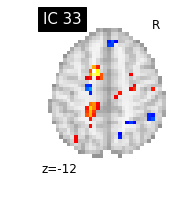

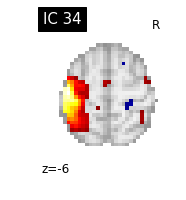

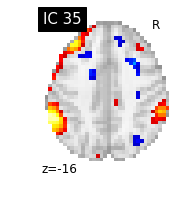

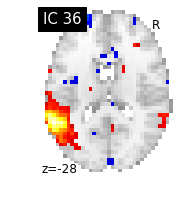

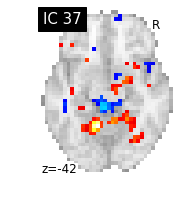

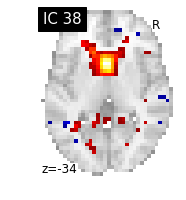

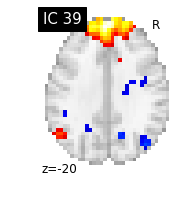

In [172]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, bg_img=T1, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False, black_bg=False)
    show()
